In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import re

import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from nltk import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ddayv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ddayv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [77]:
df_all = pd.read_csv("export_TweetSentBR.csv")
df_all.shape

(11570, 4)

In [78]:
df_all.head()

,id,id_twitter,text,sentiment
0,1343,863044774588272640,Que coisa linda! O Programa #encontro estava m...,1
1,1344,865583716088766467,"Por mais #Encontro com as Irmãs Galvão, adorei...",1
2,1345,865063232201011201,Mr. CATRA @OficialMrCatra lançando sua nova mú...,1
3,1346,864668391008763905,quem viu aquela lutadora modela barbuda tatuad...,0
4,1347,865572794016378882,Tô passada com esse cara.... quanta merda pode...,-1


In [79]:
len(df_all[df_all["sentiment"] == "-"]['text'])

37

In [80]:
df_remove = df_all[df_all['sentiment'] == '-']
df_all = df_all.drop(df_remove.index)

<AxesSubplot:xlabel='sentiment', ylabel='count'>

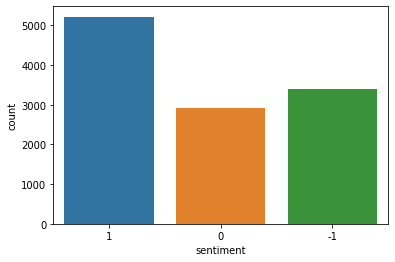

In [82]:
df_all.isnull().sum()
df_all = df_all.dropna()

sns.countplot(data=df_all, x='sentiment')

In [83]:
df_all = df_all.reset_index()
df_all

,index,id,id_twitter,text,sentiment
0,0,1343,863044774588272640,Que coisa linda! O Programa #encontro estava m...,1
1,1,1344,865583716088766467,"Por mais #Encontro com as Irmãs Galvão, adorei...",1
2,2,1345,865063232201011201,Mr. CATRA @OficialMrCatra lançando sua nova mú...,1
3,3,1346,864668391008763905,quem viu aquela lutadora modela barbuda tatuad...,0
4,4,1347,865572794016378882,Tô passada com esse cara.... quanta merda pode...,-1
...,...,...,...,...,...
11528,11565,12908,864636619000877056,eu ja to aqui pronto pro #MasterChefBR mas ain...,-1
11529,11566,12909,863581588713603072,MALUCO! Uma coisa que eu não tenho coragem é e...,-1
11530,11567,12910,864831041349054464,#MaisVoce @ANAMARIABRAGA está linda @RedeGlobo,1
11531,11568,12911,863042798575951872,"Que orgulho de ti, @sportrecife! #Encontro",1


In [84]:
df_all = df_all.drop(columns=['index'])
df_all['sentiment'].unique()

array(['1', '0', '-1'], dtype=object)

In [85]:
df_all['sentiment'] = df_all['sentiment'].apply(lambda x: int(x))

In [86]:
Tweet = df_all['text']
polarity = np.asarray(df_all['sentiment'])

np.unique(polarity)

array([-1,  0,  1], dtype=int64)

In [39]:
count_vect = CountVectorizer()
X_train = count_vect.fit_transform(Tweet)

tfidf_transformer = TfidfTransformer()
X_train_transform = tfidf_transformer.fit_transform(X_train) # Aplicando o TF-IDF
X_train_transform.shape

(11533, 13064)

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train_transform, polarity, test_size=0.3)

clf = MultinomialNB().fit(X_train, Y_train) # Aplicando naive bayes
predicted = clf.predict(X_test)

print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

          -1       0.67      0.48      0.56       992
           0       0.75      0.12      0.21       896
           1       0.57      0.94      0.71      1572

    accuracy                           0.60      3460
   macro avg       0.67      0.52      0.49      3460
weighted avg       0.65      0.60      0.54      3460



In [87]:
def pre_X(frases):
    lista = []
    
    for frase in frases:
        lista.append(frase)
        
    return lista

def pre_Y(number):
    lista = []
    
    for numb in number:
        lista.append(numb)
    
    return lista


In [88]:
def set_array(frases):
    
    vocab = []
    palavras = []
    for frase in frases:
        
        text_array = remove_user(frase)
        text_array = Tokenize(text_array)
        text_array = text_array.split(' ')
        for i in range(len(text_array)):
            vocab.append(text_array[i])
    
    
        
    return vocab

def Tokenize(f):     ## Pre-processando a frase
    
    ## Colocando em minusculo
    ## Retirando a pontuaçao
    ## Retirando as StopWords
    
    f = f.lower().replace('\n', '').replace('-','').replace('#','').replace('.','').replace(',','').replace('!','').replace('r\n','').replace('  ','')
    token = RegexpTokenizer(r"\w+")
    f = token.tokenize(f)
    
    stop_words = set(stopwords.words('portuguese'))
    
    new_word = [word for word in f if not word in stop_words]
    
    return ' '.join(new_word)

def remove_user(frase):

    return re.sub('@\w+','',frase)

In [44]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3 , activation='softmax')
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [45]:
Tweet = Tweet.apply(remove_user)
Tweet_preprocessed = Tweet.apply(Tokenize)

count_vect = CountVectorizer()
X_train = count_vect.fit_transform(Tweet_preprocessed)

tfidf_transformer = TfidfTransformer()
X_train_transform = tfidf_transformer.fit_transform(X_train) # Aplicando o TF-IDF


X_train, X_test, Y_train, Y_test = train_test_split(X_train_transform, polarity, test_size=0.3)

X_train

<8073x15346 sparse matrix of type '<class 'numpy.float64'>'
	with 56277 stored elements in Compressed Sparse Row format>

In [46]:
X_test

<3460x15346 sparse matrix of type '<class 'numpy.float64'>'
	with 24096 stored elements in Compressed Sparse Row format>

In [47]:
one = OneHotEncoder(sparse=False)

y_one = one.fit_transform(Y_train.reshape(-1,1))

In [48]:
fit = model.fit(X_train.todense(), y_one, epochs=25, validation_data=(X_test.todense(), one.transform(Y_test.reshape(-1,1))))

Epoch 1/25
253/253 [==============================] - 2s 8ms/step - loss: 1.0224 - accuracy: 0.4841 - val_loss: 0.8953 - val_accuracy: 0.5821
Epoch 2/25
253/253 [==============================] - 1s 6ms/step - loss: 0.7742 - accuracy: 0.6654 - val_loss: 0.8357 - val_accuracy: 0.6179
Epoch 3/25
253/253 [==============================] - 1s 6ms/step - loss: 0.4939 - accuracy: 0.8218 - val_loss: 0.9281 - val_accuracy: 0.6061
Epoch 4/25
253/253 [==============================] - 2s 6ms/step - loss: 0.3079 - accuracy: 0.9012 - val_loss: 1.0864 - val_accuracy: 0.5988
Epoch 5/25
253/253 [==============================] - 1s 6ms/step - loss: 0.2002 - accuracy: 0.9377 - val_loss: 1.2443 - val_accuracy: 0.5971
Epoch 6/25
253/253 [==============================] - 1s 6ms/step - loss: 0.1335 - accuracy: 0.9592 - val_loss: 1.3988 - val_accuracy: 0.5890
Epoch 7/25
253/253 [==============================] - 1s 6ms/step - loss: 0.1026 - accuracy: 0.9703 - val_loss: 1.5027 - val_accuracy: 0.5879
Epoch 

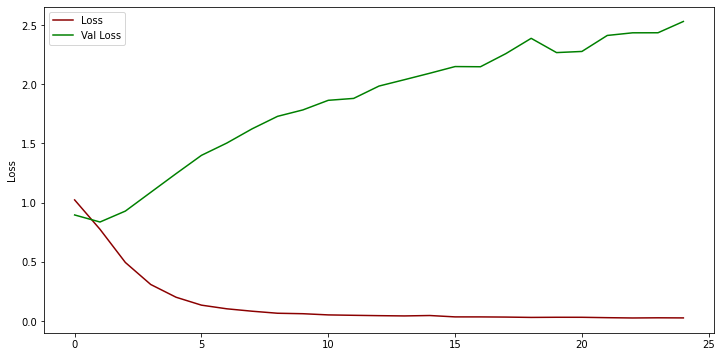

In [49]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['loss'], label='Loss', color='darkred')
plt.plot(fit.history['val_loss'], label='Val Loss', color='green')
plt.legend()
plt.ylabel('Loss')
plt.show()

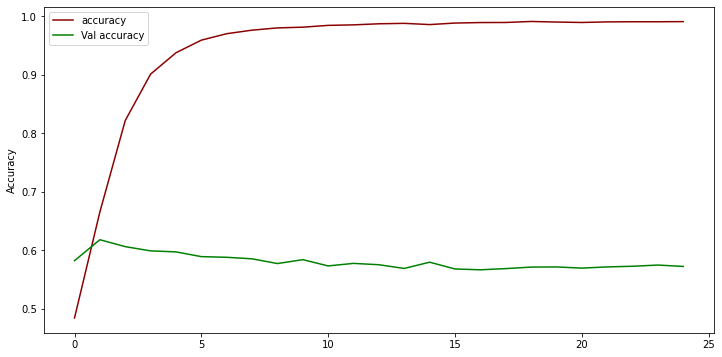

In [50]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['accuracy'], label='accuracy', color='darkred')
plt.plot(fit.history['val_accuracy'], label='Val accuracy', color='green')
plt.legend()
plt.ylabel('Accuracy')
plt.show()

In [51]:
acc = model.evaluate(X_test.todense(), one.transform(Y_test.reshape(-1,1)))

109/109 [==============================] - 0s 2ms/step - loss: 2.5297 - accuracy: 0.5723


In [89]:
vectorize_layer = TextVectorization(
 max_tokens=15000,
 output_mode='int',
 output_sequence_length=len(max(df_all['text'])))

vocab = set_array(df_all['text'])

vectorize_layer.adapt(np.unique(vocab))
len(vectorize_layer.get_vocabulary())


15000

In [106]:
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,mask_zero=True),
    
    tf.keras.layers.LSTM(50, activation='relu' ,return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.LSTM(25 , activation='tanh', return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.LSTM(10 , activation='tanh'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(3, activation='softmax')
])


model.compile(
    optimizer= tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [107]:
X_train, X_test, Y_train, Y_test = train_test_split(Tweet_preprocessed, polarity, test_size=0.3)

In [108]:
y_one = one.fit_transform(Y_train.reshape(-1,1))

In [109]:
fit = model.fit(np.asarray(pre_X(X_train)), y_one, epochs=20, batch_size=128 ,validation_data=(np.asarray(pre_X(X_test)), one.transform(Y_test.reshape(-1,1))))

Epoch 1/20
64/64 [==============================] - 6s 92ms/step - loss: 1.0744 - accuracy: 0.4555 - val_loss: 1.0398 - val_accuracy: 0.4578
Epoch 2/20
64/64 [==============================] - 4s 64ms/step - loss: 0.9157 - accuracy: 0.5705 - val_loss: 0.9280 - val_accuracy: 0.5705
Epoch 3/20
64/64 [==============================] - 4s 62ms/step - loss: 0.6832 - accuracy: 0.7437 - val_loss: 0.9670 - val_accuracy: 0.5873
Epoch 4/20
64/64 [==============================] - 4s 62ms/step - loss: 0.4938 - accuracy: 0.8354 - val_loss: 1.0623 - val_accuracy: 0.5873
Epoch 5/20
64/64 [==============================] - 4s 62ms/step - loss: 0.3717 - accuracy: 0.8844 - val_loss: 1.1573 - val_accuracy: 0.5876
Epoch 6/20
64/64 [==============================] - 4s 63ms/step - loss: 0.2883 - accuracy: 0.9168 - val_loss: 1.2975 - val_accuracy: 0.5821
Epoch 7/20
64/64 [==============================] - 4s 63ms/step - loss: 0.2356 - accuracy: 0.9334 - val_loss: 1.4108 - val_accuracy: 0.5801
Epoch 8/20
64

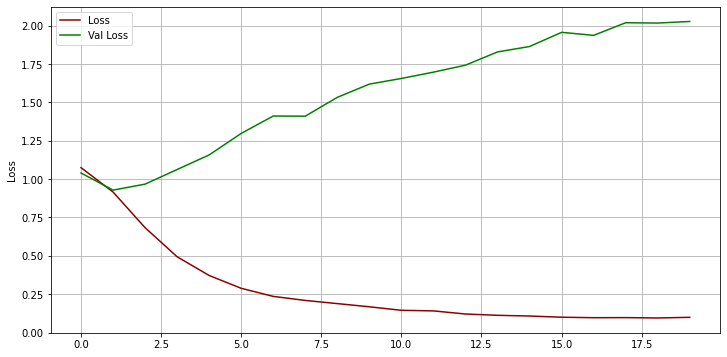

In [110]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['loss'], label='Loss', color='darkred')
plt.plot(fit.history['val_loss'], label='Val Loss', color='green')
plt.legend()
plt.grid()
plt.ylabel('Loss')
plt.show()

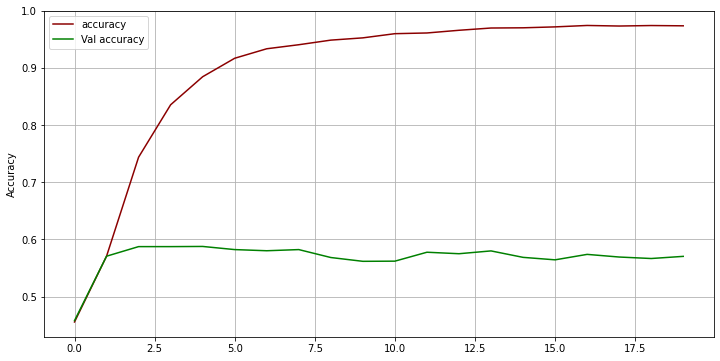

In [111]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['accuracy'], label='accuracy', color='darkred')
plt.plot(fit.history['val_accuracy'], label='Val accuracy', color='green')
plt.legend()
plt.grid()
plt.ylabel('Accuracy')
plt.show()

In [112]:
acc = model.evaluate(np.asarray(pre_X(X_test)), one.transform(Y_test.reshape(-1,1)))

109/109 [==============================] - 1s 8ms/step - loss: 2.0269 - accuracy: 0.5702
